In [1]:
import seaborn as sb
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("meteo-nogal-09.csv",engine = "python")


In [3]:

#observamos el nombre de las columnas que no se ocupan
df.columns

Index(['DATE', 'TIME', 'Unnamed: 2', 'Unnamed: 3', 'u_Avg', 'v_Avg', 'w_Avg',
       't_Avg', 'kh20_Avg', 'net_rad_Avg', 'shf1_Avg', 'shf2_Avg', 'vv_Avg',
       'airT_Avg', 'rh_Avg', 'e_sat_Avg', 'e_Avg', 'h2o_hmp_Avg',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [4]:
#Obtenemos directamente el nombre de las columnas que son innecesarias y posteriormente las eliminaremos
Unnames = []
for i in range(0,len(df.columns)):
    if(re.search("^Unnamed",df.columns[i]) != None):
        Unnames.append(df.columns[i])
Unnames

['Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35']

In [5]:
df.head()


,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Eliminar las columnas y revisamos los datos de cada columna
df = df.drop(Unnames,1)
df = df.drop(0,0)
df.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [7]:
#Tomamos unicamente los datos de 2009 y convertimos la columna Date a Fecha
df["DATE"] = pd.to_datetime(df["DATE"])
df = df[df["DATE"] < "2010-01-01"]
df.tail()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
52333,2009-12-31,23:10:00,0.736,-0.135,12.49,1050,-76.38,NAN,NAN,2.595,12.82,0.482,1.480,0.713,5.405,NaN
52334,2009-12-31,23:20:00,0.711,-0.106,12.24,1047,-75.03,NAN,NAN,2.517,12.62,0.489,1.460,0.714,5.416,NaN
52335,2009-12-31,23:30:00,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN
52336,2009-12-31,23:40:00,0.641,-0.084,11.53,1054,-71.33,NAN,NAN,2.182,11.88,0.509,1.391,0.708,5.383,NaN
52337,2009-12-31,23:50:00,0.538,-0.075,11.31,1064,-69.4,NAN,NAN,2.102,11.54,0.516,1.360,0.701,5.338,NaN


In [8]:
#Convertir las variables de object a float64
tempD = df["DATE"]
tempT = df["TIME"]
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
df["DATE"] = tempD
df["TIME"] = tempT
df.dtypes

DATE           datetime64[ns]
TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [9]:
#se contruye la matriz de correlacion
corr = df.corr()

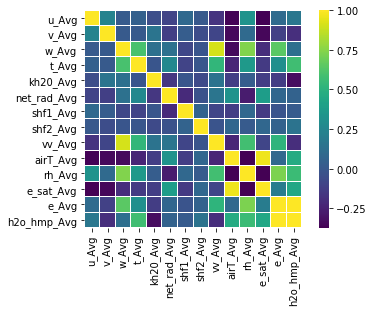

In [10]:

sb.heatmap(corr,cmap="viridis",robust=True,square=True,linewidths=.01)
plt.show()

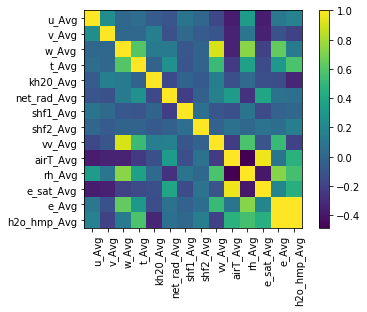

In [11]:

fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=90,ha="right",rotation_mode="anchor")


plt.imshow(corr, cmap='viridis',interpolation='nearest')
plt.colorbar()

plt.show()

In [12]:
def array(arr,st,fin):
    arra = []
    for i in range(st,fin):
        arra.append(arr[i])
    return arra

In [13]:
Cols = []
n = -1
for i in corr.index:
    n=n+1
    for j in array(corr.index,n,len(corr)):
        if(abs(corr[i][j]) > 0.6 and i != j):
            Cols.append([i,j])

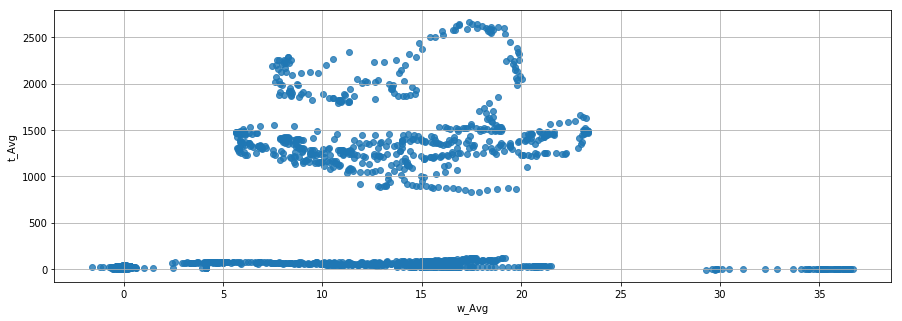

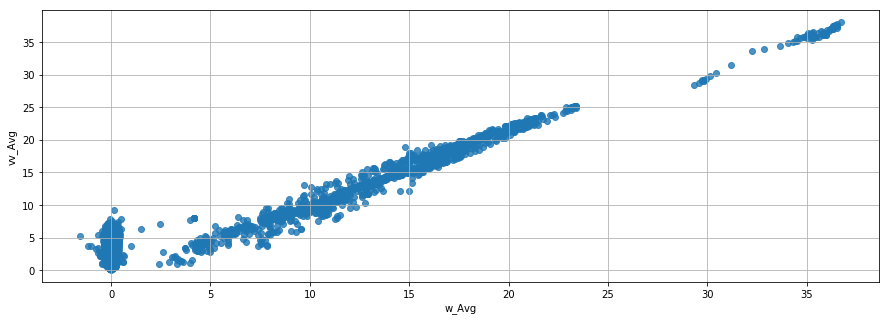

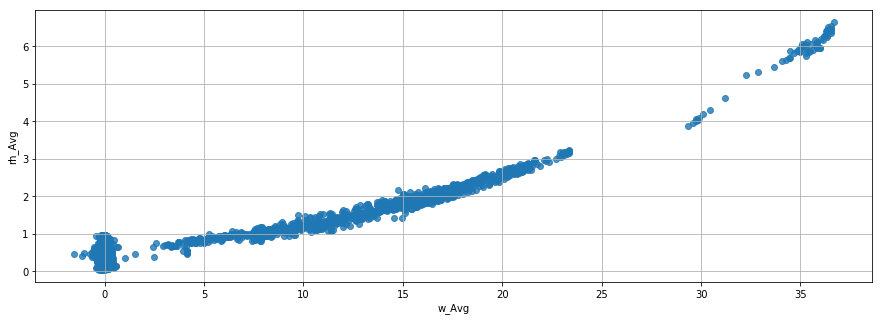

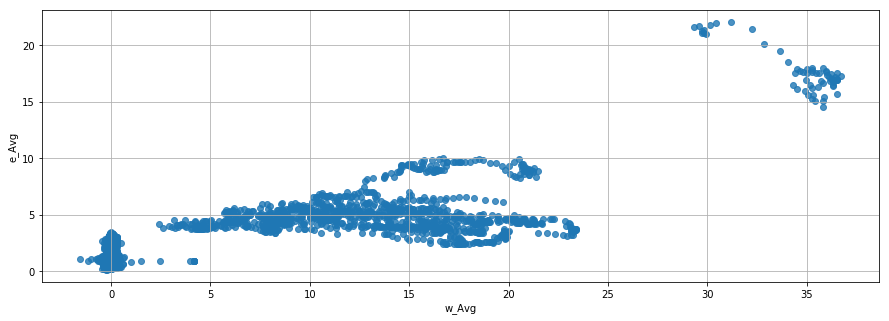

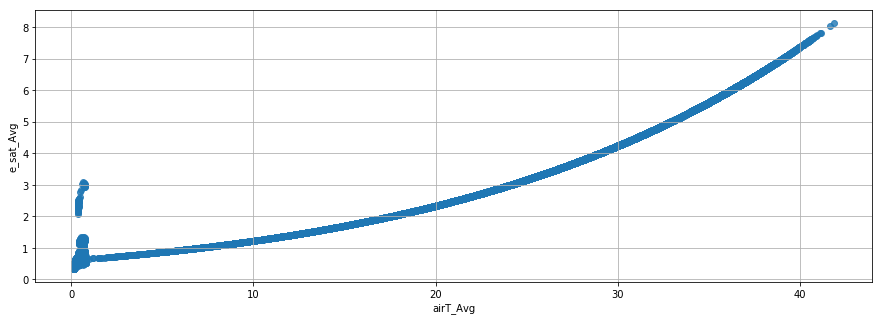

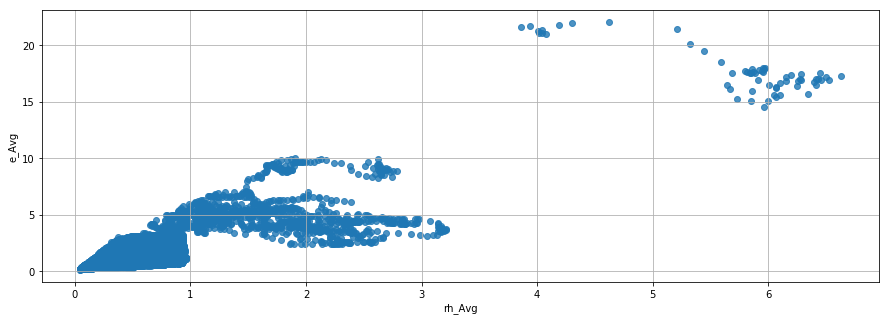

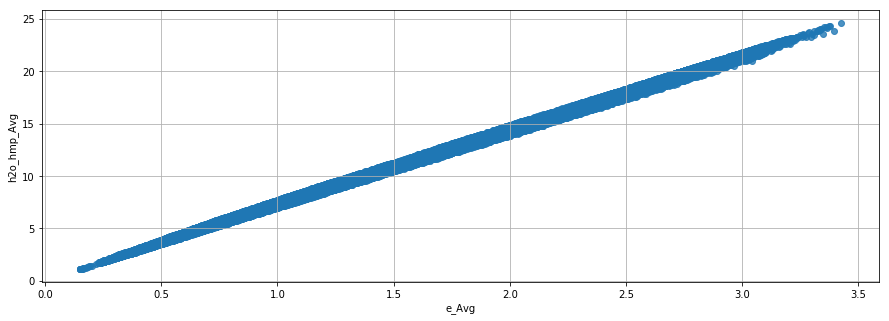

In [14]:
for i in range(0,len(Cols)):
    plt.figure(figsize=(15,5))
    sb_plot = sb.regplot(x = df[Cols[i][0]], y = df[Cols[i][1]],fit_reg=False)
    fig = sb_plot.get_figure()
    fig.savefig(fname = Cols[i][0] + " vs " + Cols[i][1] ,plt=2000)
    plt.grid()
    plt.show()